In [1]:
#1 Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2 Importing the dataset
mpg_df = pd.read_csv('auto-mpg.csv')

In [4]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# Step 4. Checking and handling the missing values, if any are present.
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
hpIsDigit = pd.DataFrame(mpg_df.horsepower.str.isdigit())  
mpg_df[hpIsDigit['horsepower'] == False]   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [32]:
# Missing values have a'?''
# Replacing missing values with median
mpg_df['horsepower'].replace('?', np.nan, inplace = True)


In [11]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
mpg_df["horsepower"] = mpg_df["horsepower"].astype("float")

In [13]:
#Step 5. Creating a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.
print(mpg_df['horsepower'].corr(mpg_df['acceleration']))

-0.689195510334236


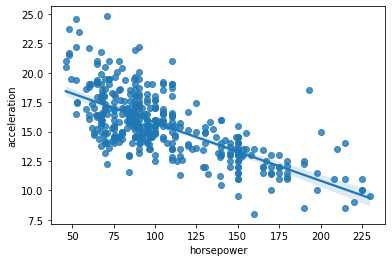

In [14]:
# use the function regplot to make a scatterplot
sns.regplot(x=mpg_df['horsepower'], y=mpg_df['acceleration'])
plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

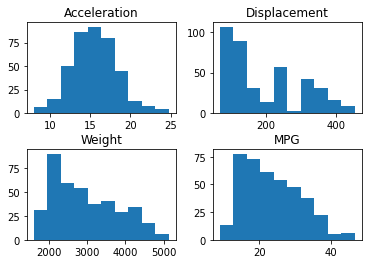

In [15]:
#Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same
fig, ax = plt.subplots(2,2)
ax[0,0].hist(mpg_df.acceleration)
ax[0,0].set_title('Acceleration')
ax[0,1].hist(mpg_df.displacement)
ax[0,1].set_title('Displacement')
ax[1,0].hist(mpg_df.weight)
ax[1,0].set_title('Weight')
ax[1,1].hist(mpg_df.mpg)
ax[1,1].set_title('MPG')
plt.subplots_adjust(wspace=0.25, hspace=0.40)

In [31]:
df2 = mpg_df[mpg_df['origin'] == 2]
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
19,26.0,4,97.0,46.0,1835,20.5,70,2
20,25.0,4,110.0,87.0,2672,17.5,70,2
21,24.0,4,107.0,90.0,2430,14.5,70,2
22,25.0,4,104.0,95.0,2375,17.5,70,2
23,26.0,4,121.0,113.0,2234,12.5,70,2
...,...,...,...,...,...,...,...,...
354,34.5,4,100.0,NaN,2320,15.8,81,2
359,28.1,4,141.0,80.0,3230,20.4,81,2
360,30.7,6,145.0,76.0,3160,19.6,81,2
375,36.0,4,105.0,74.0,1980,15.3,82,2


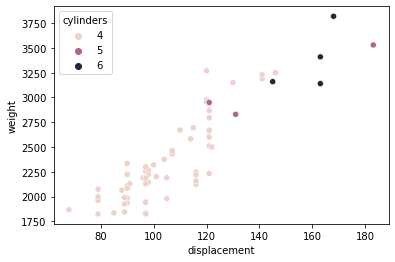

In [18]:
#Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file.
# use the function regplot to make a scatterplot
sns.scatterplot(data = df2, x='displacement', y='weight', hue = 'cylinders')
plt.savefig("Plotting_Correlation_Scatterplot_With_Hues_Fit.jpg")

C:\Users\U1137386\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='count'>

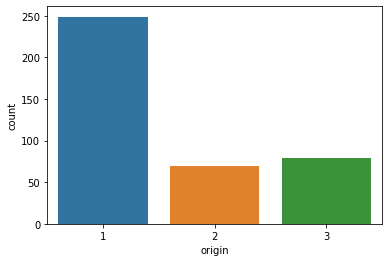

In [20]:
#Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same
sns.countplot(mpg_df.origin)

In [21]:
#Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same
correlation = mpg_df.corr()['mpg']
correlation

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

<BarContainer object of 5 artists>

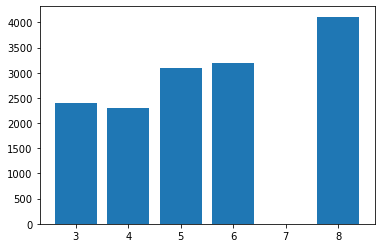

In [22]:
#Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same
a = mpg_df.groupby('cylinders')['weight'].mean()
b = np.array([3,4,5,6,8])
plt.bar(b,a)

In [23]:
#Step 11. Check for the outliers in the dataset. Note down the insight for the same.
Q1 = mpg_df.quantile(0.25)
Q3 = mpg_df.quantile(0.75)
IQR = Q3 - Q1

In [24]:
((mpg_df < (Q1 - 1.5 * IQR)) | (mpg_df > (Q3 + 1.5 * IQR))).sum()

C:\Users\U1137386\AppData\Local\Temp\ipykernel_26360\1843379597.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((mpg_df < (Q1 - 1.5 * IQR)) | (mpg_df > (Q3 + 1.5 * IQR))).sum()


acceleration     7
car name         0
cylinders        0
displacement     0
horsepower      10
model year       0
mpg              1
origin           0
weight           0
dtype: int64

In [25]:
#Step 12. Plot the correlations for variables.
mpg_df.drop(columns = ['car name'], inplace = True)

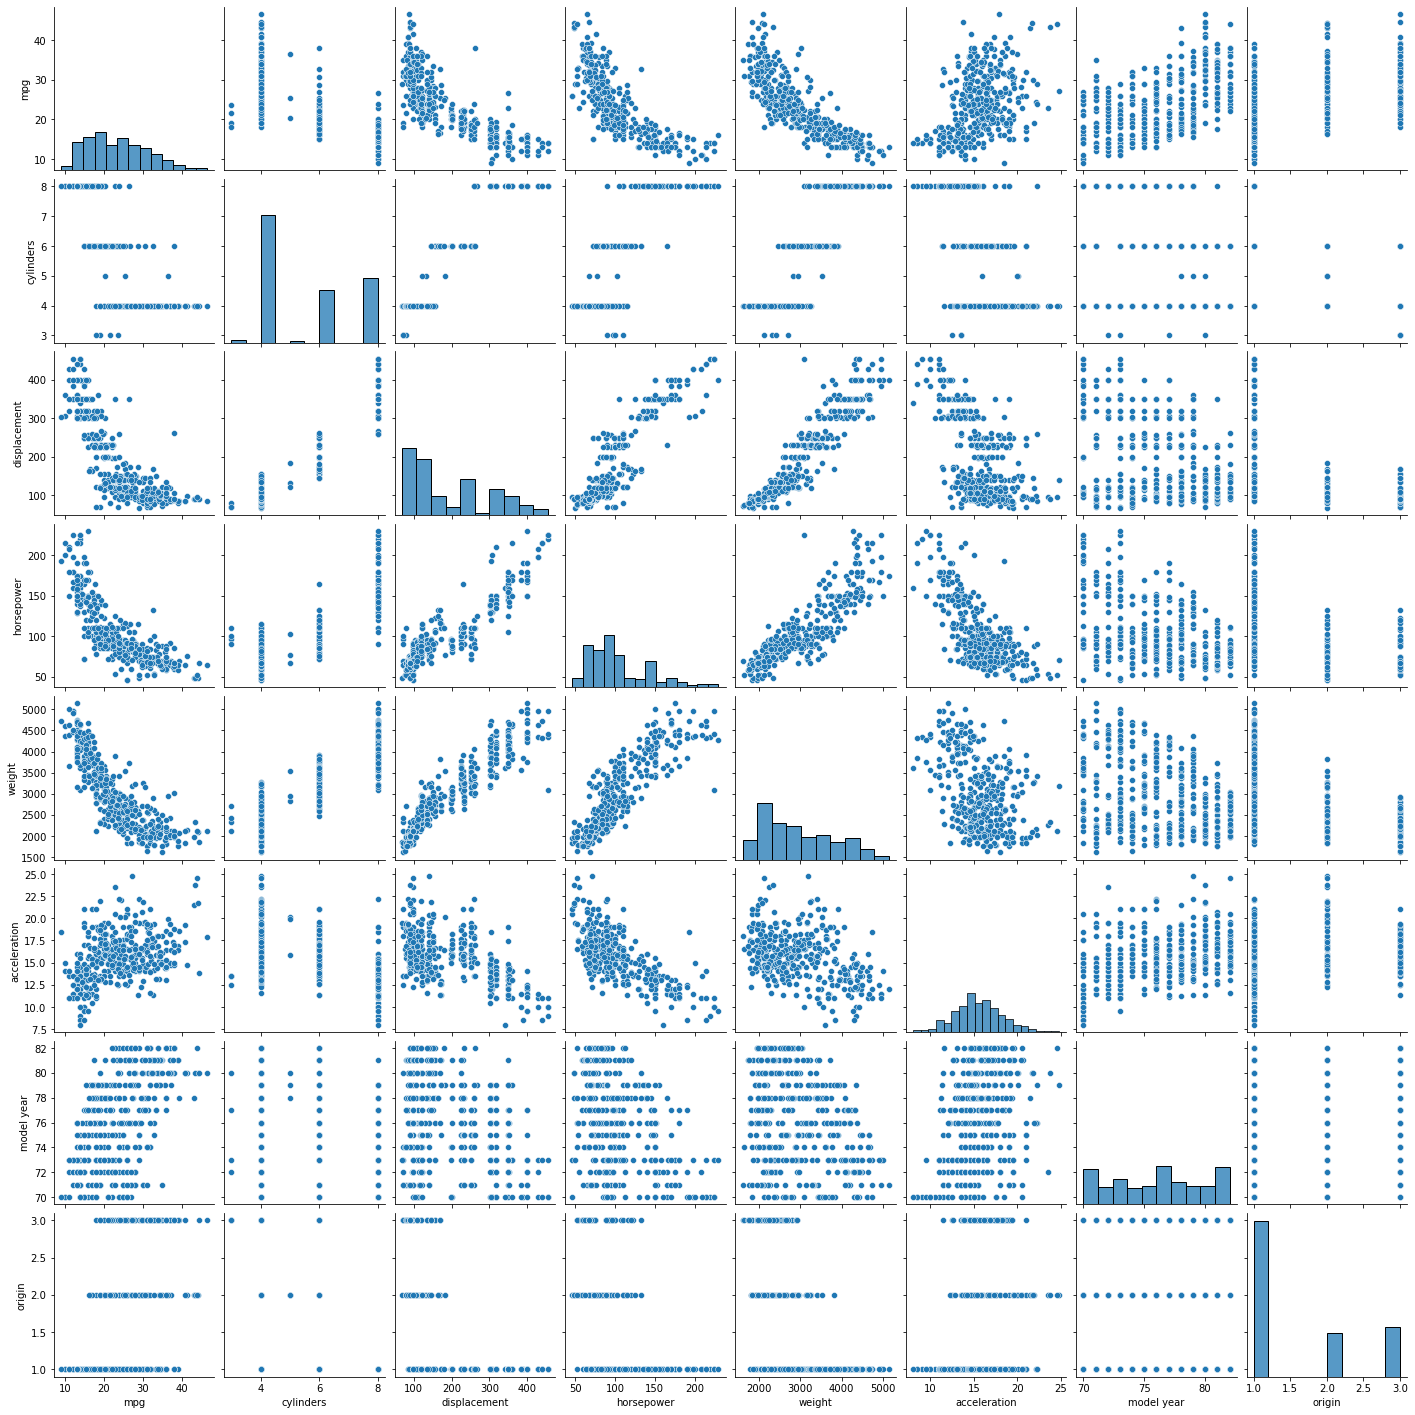

In [26]:
sns.pairplot(data = mpg_df)